<a href="https://colab.research.google.com/github/armandordorica/Portfolio_Optimization/blob/master/Markowitz_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
ls

sample_data/


# **1. Classic Markowitz - Fixed Required Return Minimized Variance Portfolio**

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Fri May 10 16:08:38 2019

@author: Rosario
Classic Markowitz for Fixed Required Return w Minimizing Variance Portfolio
"""

import numpy as np
import pandas as pd
import scipy.optimize as sco

# load data
data= pd.read_csv('L5_Data.csv', index_col =0)


In [4]:
data

,AAPL,MSFT,YHOO,DB,GLD
Date,,,,,
2010-01-04,28.588685,26.593966,17.100000,61.392277,109.800003
2010-01-05,28.638111,26.602557,17.230000,62.565957,109.699997
2010-01-06,28.182584,26.439299,17.170000,61.484485,111.510002
2010-01-07,28.130486,26.164338,16.700001,62.180321,110.820000
2010-01-08,28.317506,26.344781,16.700001,64.427088,111.370003
...,...,...,...,...,...
2014-09-08,96.706827,45.257913,41.810001,34.039067,120.730003
2014-09-09,96.343043,45.540346,40.779999,33.834365,120.870003
2014-09-10,99.302455,45.618262,41.139999,34.399735,120.260002


In [5]:

#Compute the (log) returns from prices.
#returns=np.log(data/data.shift(1)) #do not use
returns=(data-data.shift(1))/data.shift(1)

#Get the number of assets as a variable.
no_assets=len(returns.columns.tolist())

# Application: Minimize variance of a portfolio
# subject to a target return: TargetRet

# A portfolio-building function
def portfolio(weights):
    weights = np.array(weights)
    P_ret = np.sum(returns.mean()*weights)*252
    P_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    return np.array([P_ret,P_vol, P_ret/P_vol])



#The required return is in `TargetRet`


In [6]:
TargetRet=[0.08]


# Constraints 
**Set up the constraint that the portfolio return is equal to the TargetRet and the portfolio weights add up to one.**

In [7]:
cons=({'type':'eq', 'fun':lambda x: portfolio(x)[0]-TargetRet},
      {'type':'eq', 'fun':lambda x: np.sum(x)-1})


**Set up boundaries for the portfolio weights (between 0 and 1) (=no short selling)**

In [8]:
bnds=tuple((0,1) for x in range(no_assets))

#Optimisation function.
#scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
#fun : callable
#The objective function to be minimized.
#in this case: potfolio(x)[1] = P_vol 
#x0 : ndarray, shape (n,)
#Initial guess. Array of real elements of size (n,), where ‘n’ is the number of independent variables.
#In this case: [0.2, 0.2, 0.2, 0.2, 0.2]
#method : str or callable, optional
#Type of solver
#In this case: Sequential Least SQuares Programming (SLSQP)
#bounds : sequence or Bounds, Sequence of (min, max) pairs for each element in x. 
#in this case: bnds
#constraints : {Constraint, dict} 
#Equality constraint means that the constraint function result is to be zero whereas 
#inequality means that it is to be non-negative


#Optimisation function - we minimize the variance 

In [9]:
result=sco.minimize(lambda x: portfolio(x)[1], no_assets*[1.0/no_assets], 
                 method='SLSQP', bounds=bnds, constraints=cons)


In [10]:
answer = portfolio(result['x'])

In [11]:
   ##The weights of the minimum volatilty portfolio having the required return is:
FinalWeights = result['x']
print("Final Weights=", FinalWeights) #final weights
print("Portfolio's return : {} \n Portfolio's volatility :{}, \n Portfolio's Sharpe Ratio:{} ".format(answer[0], answer[1], answer[2])) # statistics  P_ret,P_vol, P_ret/P_vol



Final Weights= [0.00899536 0.27650849 0.07623892 0.0041522  0.63410502]
Portfolio's return : 0.07999999999356923 
 Portfolio's volatility :0.13886528013359659, 
 Portfolio's Sharpe Ratio:0.5760979268295466 


In [12]:
sum(FinalWeights)
w1 = FinalWeights
w1

array([0.00899536, 0.27650849, 0.07623892, 0.0041522 , 0.63410502])

# **2.Classic Markowitz - Fixed Required Return Minimized Variance Portfolio - Efficient Frontier**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

# load data
data= pd.read_csv('L5_Data.csv', index_col =0)
data

,AAPL,MSFT,YHOO,DB,GLD
Date,,,,,
2010-01-04,28.588685,26.593966,17.100000,61.392277,109.800003
2010-01-05,28.638111,26.602557,17.230000,62.565957,109.699997
2010-01-06,28.182584,26.439299,17.170000,61.484485,111.510002
2010-01-07,28.130486,26.164338,16.700001,62.180321,110.820000
2010-01-08,28.317506,26.344781,16.700001,64.427088,111.370003
...,...,...,...,...,...
2014-09-08,96.706827,45.257913,41.810001,34.039067,120.730003
2014-09-09,96.343043,45.540346,40.779999,33.834365,120.870003
2014-09-10,99.302455,45.618262,41.139999,34.399735,120.260002


**Compute the (log) returns from prices**


In [14]:

returns=(data-data.shift(1))/data.shift(1)


**Get the number of assets as a variable**


In [15]:

no_assets=len(returns.columns.tolist())

# Problem: Minimize variance of a portfolio
# subject to a target return: TargetRet

# A portfolio-building function
def portfolio(weights):
    weights = np.array(weights)
    P_ret = np.sum(returns.mean()*weights)*252
    P_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    return np.array([P_ret,P_vol, P_ret/P_vol])


**The required return is: `TargetRet=[0.08]`**

In [16]:
TargetRet=[0.08]


**Set up the constraint that the portfolio return is equal to the TargetRet and the portfolio weights add up to one**

In [17]:
cons=({'type':'eq', 'fun':lambda x: portfolio(x)[0]-TargetRet},
      {'type':'eq', 'fun':lambda x: np.sum(x)-1})

#Set up boundaries for the portfolio weights (between 0 and 1) (=no short selling)
bnds=tuple((0,1) for x in range(no_assets))


In [18]:

#Optimisation function.
#scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
#fun : callable
#The objective function to be minimized.
#in this case: potfolio(x)[1] = P_vol 
#x0 : ndarray, shape (n,)
#Initial guess. Array of real elements of size (n,), where ‘n’ is the number of independent variables.
#In this case: [0.2, 0.2, 0.2, 0.2, 0.2]
#method : str or callable, optional
#Type of solver
#In this case: Sequential Least SQuares Programming (SLSQP)
#bounds : sequence or Bounds, Sequence of (min, max) pairs for each element in x. 
#in this case: bnds
#constraints : {Constraint, dict} 
#Equality constraint means that the constraint function result is to be zero whereas 
#inequality means that it is to be non-negative

#Optimisation function.
#we minimize the variance 
result=sco.minimize(lambda x: portfolio(x)[1], no_assets*[1.0/no_assets], 
                 method='SLSQP', bounds=bnds, constraints=cons)


##The weights of the minimum volatilty portfolio having the required return is:
FinalWeights = result['x']
print("Final Weights=", FinalWeights) #final weights
print("P_ret,P_vol,P_ret/P_vol=", portfolio(result['x'])) # statistics  P_ret,P_vol, P_ret/P_vol

Final Weights= [0.00899536 0.27650849 0.07623892 0.0041522  0.63410502]
P_ret,P_vol,P_ret/P_vol= [0.08       0.13886528 0.57609793]


# Efficient frontier plot
* Problem: Minimize variance of a portfolio subject to a target return:TargetRet
* We solve this problem for many levels of the target return (in a loop)
* Each time we do, we get another point in the efficient frontier
* We need to specify the constraint in a loop, as the target return is always changing.


     fun: 0.22919089726708258
     jac: array([0.09593865, 0.09905604, 0.1025685 , 0.38407913, 0.09248459])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([2.84203420e-17, 4.59701721e-17, 0.00000000e+00, 4.68823286e-01,
       5.31176714e-01])
     fun: 0.2089461213771026
     jac: array([0.09249772, 0.09305288, 0.09394051, 0.36122499, 0.1097224 ])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.00000000e+00, 0.00000000e+00, 9.32324229e-17, 3.94523666e-01,
       6.05476334e-01])
     fun: 0.19212116276042834
     jac: array([0.08674637, 0.08423504, 0.08197558, 0.32753123, 0.12833315])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.00000000e+00, 1.17961196e-16, 7.00062014e-17, 3.20224046e-01,
       6.79775954e-01])
     fun: 0.17967928

<Figure size 432x288 with 0 Axes>

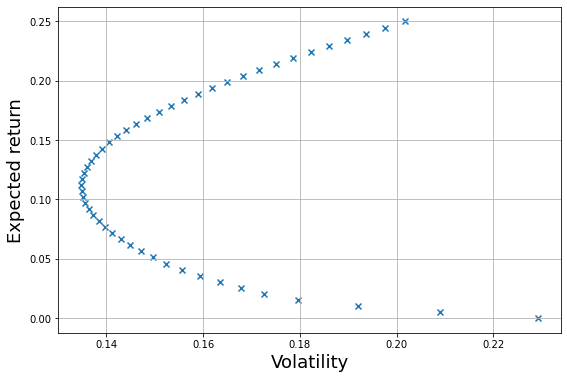

In [19]:

#Define a range for target returns.
TargetRet=np.linspace(0.0,0.25,50)

#Define an (empty) vector for the corresponding minimum volatilities.
MinVols=[]

#Efficient Frontier Optimization Loop

#In a loop of target returns, minimise standard deviation (volatility) under the
#constraint that the portfolio return equals the target return.

for tret in TargetRet:
    #constraints:
    #portfolio return (see P_ret above) should equal target return, sum of weights x equals 1
    cons=({'type':'eq', 'fun':lambda x: portfolio(x)[0]-tret},
          {'type':'eq', 'fun':lambda x: np.sum(x)-1})
    #optimization function
    #the objective function to be minimized is the portfolio function in particular,
    #the vlatility output: P_vol above)
    res=sco.minimize(lambda x: portfolio(x)[1], no_assets*[1.0/no_assets], 
                     method='SLSQP', bounds=bnds, constraints=cons)
    MinVols.append(res['fun'])
    print(res)

MinVols=np.array(MinVols)

#Efficient Frontier Optimization Results

plt.clf()

#Efficient Frontier Plot
plt.figure(figsize=(9,6))
plt.scatter(MinVols, TargetRet, marker='x')
plt.grid()
plt.xlabel('Volatility', fontsize=18)
plt.ylabel('Expected return', fontsize=18)
plt.savefig('F2.pdf', bbox='tight')



**Showing the optimal weights of each of the five securities**

In [20]:
res['x']

array([5.63564030e-01, 1.00753426e-01, 2.56675574e-01, 1.81620805e-17,
       7.90069707e-02])

In [21]:
w2 = res['x']
w2

array([5.63564030e-01, 1.00753426e-01, 2.56675574e-01, 1.81620805e-17,
       7.90069707e-02])

# 3. Classic Markowitz - Minimum Variance Portfolio

In [22]:
# -*- coding: utf-8 -*-
"""
Created on Fri May 10 16:08:38 2019

Classic Markowitz for Minimum Variance Portfolio (no fixed return required)

@author: Rosario
"""

import numpy as np
import pandas as pd
import scipy.optimize as sco

# load data
data= pd.read_csv('L5_Data.csv', index_col =0)

#Compute the (log) returns from prices.
#returns=np.log(data/data.shift(1)) #do not use
returns=(data-data.shift(1))/data.shift(1)

#Get the number of assets as a variable.
no_assets=len(returns.columns.tolist())

#Application: Minimum variance portfolio
#Minimum variance portfolio 

# A portfolio-building function
def portfolio(weights):
    weights = np.array(weights)
    P_ret = np.sum(returns.mean()*weights)*252
    P_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    return np.array([P_ret,P_vol, P_ret/P_vol])

#Define a function for the portfolio variance.
#Variance is the square of the volatility a.k.a. standard deviation
def Variance(weights):
	return portfolio(weights)[1]**2

#Set up the constraint that portfolio weights add up to one.
cons=({'type':'eq', 'fun':lambda x: np.sum(x)-1})
#Set up boundaries for the portfolio weights (between 0 and 1) (=no short selling)
bnds=tuple((0,1) for x in range(no_assets))

#Optimisation function.
#scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
#fun : callable
#The objective function to be minimized.
#in this case: Variance 
#x0 : ndarray, shape (n,)
#Initial guess. Array of real elements of size (n,), where ‘n’ is the number of independent variables.
#In this case: [0.2, 0.2, 0.2, 0.2, 0.2]
#method : str or callable, optional
#Type of solver
#In this case: Sequential Least SQuares Programming (SLSQP)
#bounds : sequence or Bounds, Sequence of (min, max) pairs for each element in x. 
#in this case: bnds
#constraints : {Constraint, dict} 
#Equality constraint means that the constraint function result is to be zero whereas 
#inequality means that it is to be non-negative

#Optimisation function.
#we minimize the variance
result = sco.minimize(Variance, no_assets*[1.0/no_assets], method='SLSQP', bounds=bnds, constraints=cons)

#Print optimized minimum Variance portfolio weights.
print("weights= ", result['x'].round(3)) # weights
#Minimum variance portfolio properties.
print("P_ret,P_vol,P_ret/P_vol=", portfolio(result['x'])) # statistics  P_ret,P_vol, P_ret/P_vol


weights=  [0.107 0.248 0.109 0.    0.536]
P_ret,P_vol,P_ret/P_vol= [0.11071119 0.1348326  0.82110102]


In [23]:
w3 = result['x'].round(3)
w3

array([0.107, 0.248, 0.109, 0.   , 0.536])

# 4. Classic Markowitz - Maximum Sharpe Portfolio or Market Portfolio 

In [24]:

import numpy as np
import pandas as pd
import scipy.optimize as sco

# load data
data= pd.read_csv('L5_Data.csv', index_col =0)

#Compute the (log) returns from prices.
#returns=np.log(data/data.shift(1)) #do not use
returns=(data-data.shift(1))/data.shift(1)

#Get the number of assets as a variable.
no_assets=len(returns.columns.tolist())

#Application: Minimum variance portfolio
#Minimum variance portfolio 


#Let the risk-free rate, r_f = 1%.
r_f = .01

# A portfolio-building function
def portfolio_CAPM(weights, r_f):
    weights = np.array(weights)
    P_ret = np.sum(returns.mean()*weights)*252
    P_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    return np.array([P_ret,P_vol, (P_ret-r_f)/P_vol]) #modified to include risk-free rate

def Sharpe_CAPM(weights):
    return -portfolio_CAPM(weights, r_f)[2]

#Set up the constraint that portfolio weights add up to one.
cons=({'type':'eq', 'fun':lambda x: np.sum(x)-1})
#Set up boundaries for the portfolio weights (between 0 and 1) (=no short selling)
bnds=tuple((0,1) for x in range(no_assets))

#Optimisation function.
#scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
#fun : callable
#The objective function to be minimized.
#in this case: Sharpe
#x0 : ndarray, shape (n,)
#Initial guess. Array of real elements of size (n,), where ‘n’ is the number of independent variables.
#In this case: [0.2, 0.2, 0.2, 0.2, 0.2]
#method : str or callable, optional
#Type of solver
#In this case: Sequential Least SQuares Programming (SLSQP)
#bounds : sequence or Bounds, Sequence of (min, max) pairs for each element in x. 
#in this case: bnds
#constraints : {Constraint, dict} 
#Equality constraint means that the constraint function result is to be zero whereas 
#inequality means that it is to be non-negative

#Optimisation function.
#we minimize the variance
result = sco.minimize(Sharpe_CAPM, no_assets*[1.0/no_assets], method='SLSQP', bounds=bnds, constraints=cons)

#Print optimized minimum Variance portfolio weights.
print("weights= ",result['x'].round(3)) # weights
#Minimum variance portfolio properties.
print("P_ret,P_vol,P_ret/P_vol= ", portfolio_CAPM(result['x'], r_f)) # statistics  P_ret,P_vol, P_ret/P_vol


weights=  [0.615 0.083 0.274 0.    0.028]
P_ret,P_vol,P_ret/P_vol=  [0.26574934 0.21469091 1.19124438]


In [25]:
w4 = result['x'].round(3)
w4

array([0.615, 0.083, 0.274, 0.   , 0.028])

# 5. Classic Markowitz - Fixed Required Return Minimiized Variance Portfolio - Efficient Frontier - Fake [link text](https://)

Final Weights= [0.00899536 0.27650849 0.07623892 0.0041522  0.63410502]
P_ret,P_vol,P_ret/P_vol= [0.08       0.13886528 0.57609793]
     fun: 0.22919089726708258
     jac: array([0.09593865, 0.09905604, 0.1025685 , 0.38407913, 0.09248459])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([2.84203420e-17, 4.59701721e-17, 0.00000000e+00, 4.68823286e-01,
       5.31176714e-01])
     fun: 0.2089461213771026
     jac: array([0.09249772, 0.09305288, 0.09394051, 0.36122499, 0.1097224 ])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.00000000e+00, 0.00000000e+00, 9.32324229e-17, 3.94523666e-01,
       6.05476334e-01])
     fun: 0.19212116276042834
     jac: array([0.08674637, 0.08423504, 0.08197558, 0.32753123, 0.12833315])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 4
    njev: 4
  status: 0
 success

<Figure size 432x288 with 0 Axes>

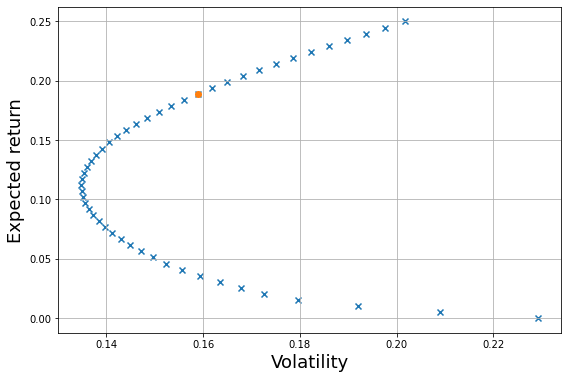

In [33]:
# -*- coding: utf-8 -*-
"""
Created on Fri May 10 16:08:38 2019

@author: Rosario
Classic Markowitz for Fixed Required Return w Minimizing Variance Portfolio
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

# load data
data= pd.read_csv('L5_Data.csv', index_col =0)

#Compute the (log) returns from prices.
#returns=np.log(data/data.shift(1)) #do not use
returns=(data-data.shift(1))/data.shift(1)

#Get the number of assets as a variable.
no_assets=len(returns.columns.tolist())

# Problem: Minimize variance of a portfolio
# subject to a target return: TargetRet

# A portfolio-building function
def portfolio(weights):
    weights = np.array(weights)
    P_ret = np.sum(returns.mean()*weights)*252
    P_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    return np.array([P_ret,P_vol, P_ret/P_vol])


#The required return is:
TargetRet=[0.08]

#Set up the constraint that 
#the portfolio return is equal to the TargetRet and
#the portfolio weights add up to one.

cons=({'type':'eq', 'fun':lambda x: portfolio(x)[0]-TargetRet},
      {'type':'eq', 'fun':lambda x: np.sum(x)-1})

#Set up boundaries for the portfolio weights (between 0 and 1) (=no short selling)
bnds=tuple((0,1) for x in range(no_assets))

#Optimisation function.
#scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
#fun : callable
#The objective function to be minimized.
#in this case: potfolio(x)[1] = P_vol 
#x0 : ndarray, shape (n,)
#Initial guess. Array of real elements of size (n,), where ‘n’ is the number of independent variables.
#In this case: [0.2, 0.2, 0.2, 0.2, 0.2]
#method : str or callable, optional
#Type of solver
#In this case: Sequential Least SQuares Programming (SLSQP)
#bounds : sequence or Bounds, Sequence of (min, max) pairs for each element in x. 
#in this case: bnds
#constraints : {Constraint, dict} 
#Equality constraint means that the constraint function result is to be zero whereas 
#inequality means that it is to be non-negative

#Optimisation function.
#we minimize the variance 
result=sco.minimize(lambda x: portfolio(x)[1], no_assets*[1.0/no_assets], 
                 method='SLSQP', bounds=bnds, constraints=cons)


##The weights of the minimum volatilty portfolio having the required return is:
FinalWeights = result['x']
print("Final Weights=", FinalWeights) #final weights
print("P_ret,P_vol,P_ret/P_vol=", portfolio(result['x'])) # statistics  P_ret,P_vol, P_ret/P_vol

# Efficient frontier plot
# Problem: Minimize variance of a portfolio
# subject to a target return: TargetRet
# We solve this problem for many levels of the target return (in a loop)
# Each time we do, we get another point in the efficient frontier
# We need to specify the constraint in a loop, as the target return
# is always changing.

#Define a range for target returns.
TargetRet=np.linspace(0.0,0.25,50)

#Define an (empty) vector for the corresponding minimum volatilities.
MinVols=[]

#Efficient Frontier Optimization Loop

#In a loop of target returns, minimise standard deviation (volatility) under the
#constraint that the portfolio return equals the target return.

for tret in TargetRet:
    #constraints:
    #portfolio return (see P_ret above) should equal target return, sum of weights x equals 1
    cons=({'type':'eq', 'fun':lambda x: portfolio(x)[0]-tret},
          {'type':'eq', 'fun':lambda x: np.sum(x)-1})
    #optimization function
    #the objective function to be minimized is the portfolio function in particular, the vlatility output: P_vol above)
    result=sco.minimize(lambda x: portfolio(x)[1], no_assets*[1.0/no_assets], 
                     method='SLSQP', bounds=bnds, constraints=cons)
    MinVols.append(result['fun'])
    print(result)

MinVols=np.array(MinVols)

#Efficient Frontier Optimization Results

plt.clf()

#Efficient Frontier Plot
plt.figure(figsize=(9,6))
plt.scatter(MinVols, TargetRet, marker='x')
plt.grid()
plt.xlabel('Volatility', fontsize=18)
plt.ylabel('Expected return', fontsize=18)
plt.savefig('F2.pdf', bbox='tight')

#Flipped Optimization
#It is possible to optimize the weights by targeting a level of volatility and maximizing the return. 
# However, doing so requires a different optimization setup altogehter. 
# We will continue using the current setup, but use a very inefficient work around (a lookup table)

#If a given level of MinVol is required, this table can be used to identify the appropriate TargetRet.
#Suppose we want to keep volatility below .16, then, use MinVols to identify the volatility near .16
#And use TargetRet to identify the corresponding target return (the higher one of the two TargetRets, in the upper half of the parabola)
#For example, if the MinVol =0.158885, then TargetRet=0.188776 (computers will have slightly different results)
#We are going to do this selection of TargetRet by hand (for now) having looked first at the Table, but this can be done programmatically
Table=pd.DataFrame(MinVols, columns=['MinVols'])
Table['TargetRet']=pd.Series(TargetRet)
print(Table.sort_values(by=['MinVols']))

#For TargetRet=0.188776, what are the weights of the minimum volatility portfolio?

#The required return is:
TargetRet_1=[0.188776] #selected by hand, having looked at the Table
MinVol_1=[]

cons=({'type':'eq', 'fun':lambda x: portfolio(x)[0]-TargetRet_1},
      {'type':'eq', 'fun':lambda x: np.sum(x)-1})
result=sco.minimize(lambda x: portfolio(x)[1], no_assets*[1.0/no_assets], 
                 method='SLSQP', bounds=bnds, constraints=cons)
MinVol_1.append(result['fun'])

##The predicted volatility is:
MinVol_1=np.array(MinVol_1)
print('predicted volatility= ', TargetRet_1)
print('required return= ', MinVol_1)
##The weights of the portfolio with fixed required MinVol is:
FinalWeights = result['x']
print("Final Weights= ",FinalWeights)
plt.scatter(MinVol_1, TargetRet_1, marker='o')





In [34]:
w5 = FinalWeights

# Summary of Results

In [36]:
dict = {'program 1': w1, 'program 2': w2, 'program 3': w3, 'program 4':w4, 'program 5': w5}
df = pd.DataFrame(dict, index =list(data.columns))
df

,program 1,program 2,program 3,program 4,program 5
AAPL,0.008995,5.635640e-01,0.107,0.615,0.362975
MSFT,0.276508,1.007534e-01,0.248,0.083,0.164897
YHOO,0.076239,2.566756e-01,0.109,0.274,0.191890
DB,0.004152,1.816208e-17,0.000,0.000,0.000000
GLD,0.634105,7.900697e-02,0.536,0.028,0.280237


In [37]:
x_axis = np.arange(0, 1, 0.01)

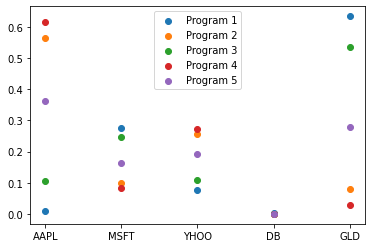

In [38]:
plt.scatter(df.index, df['program 1'], label='Program 1')
plt.scatter(df.index, df['program 2'], label='Program 2')
plt.scatter(df.index, df['program 3'], label='Program 3')
plt.scatter(df.index, df['program 4'], label='Program 4')
plt.scatter(df.index, df['program 5'], label='Program 5')

plt.legend()

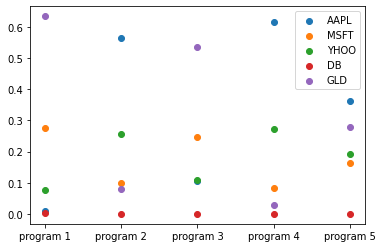

In [39]:
plt.scatter(df.columns, df.iloc[0], label='AAPL')
plt.scatter(df.columns, df.iloc[1], label='MSFT')
plt.scatter(df.columns, df.iloc[2], label='YHOO')
plt.scatter(df.columns, df.iloc[3], label='DB')
plt.scatter(df.columns, df.iloc[4], label='GLD')
plt.legend()

In [40]:
df_dates = list(data.index)
df_dates = np.array(df_dates)

In [41]:
data.index[0:len(data):100]

Index(['2010-01-04', '2010-05-27', '2010-10-19', '2011-03-14', '2011-08-04',
       '2011-12-27', '2012-05-21', '2012-10-11', '2013-03-11', '2013-08-01',
       '2013-12-23', '2014-05-19'],
      dtype='object', name='Date')

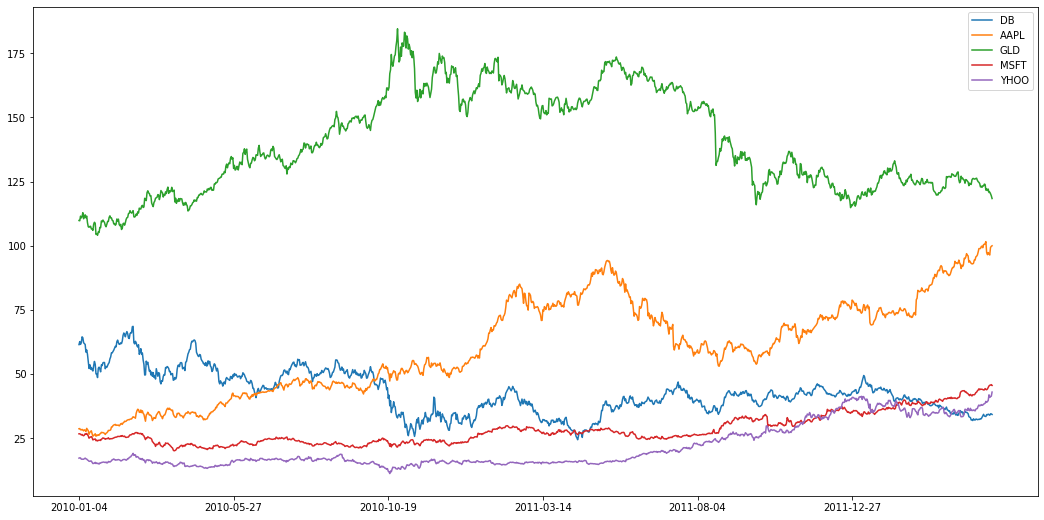

In [42]:
plt.figure(figsize = (18,9))
plt.plot(df_dates, data['DB'], label='DB')
plt.plot(df_dates, data['AAPL'], label='AAPL')
plt.plot(df_dates, data['GLD'], label='GLD')
plt.plot(df_dates, data['MSFT'], label='MSFT')
plt.plot(df_dates, data['YHOO'], label='YHOO')

plt.xticks(np.arange(0,len(data),200), data.index[0:len(data):100])

plt.legend()


